## SVM and Multinomial Linear Regression Models Code ##

### DS 4002 Prototyping ###

#### Katrina Garcia, Zoe Gates (GL), Andrew Otwell ####

Intial Upload of Data

In [5]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Upload scraped recipe data
recipe = pd.read_csv("https://raw.githubusercontent.com/gatesz33/asian_recipe_classifier_ds4002/refs/heads/main/DATA/asianrecipesfinal.csv")

In [7]:
#Check
recipe.head()

,country,recipe_title,ingredients,instructions
0,chinese,Beef and mushrooms stir-fry Chinese style,"Hoisin sauce, Shaoxing wine, beef, bell pepper...","[{'@type': 'HowToStep', 'text': 'Cut the flank..."
1,chinese,Yu Xiang Eggplant (鱼香茄子),"Chinkiang vinegar, Red chili and green onion t...","[{'@type': 'HowToStep', 'text': 'Cut the eggpl..."
2,chinese,Scallion Oil Noodles 葱油拌面,"bunch scallions, dark soy sauce, light soy sau...","[{'@type': 'HowToStep', 'text': 'Wash and pat ..."
3,chinese,Stuffed bitter melon recipe,"Ingredients A, Ingredients B, Ingredients C, S...","[{'@type': 'HowToStep', 'text': 'Remove both e..."
4,chinese,Crispy Fried Shrimp Recipe,"AllPurpose Flour, Baking Powder, Cornstarch, E...","[{'@type': 'HowToStep', 'text': 'Shell and dev..."


In [8]:
len(recipe)

263

In [9]:
recipe['country'].value_counts()

country
chinese       98
malaysian     70
indian        28
thai          27
japanese      26
vietnamese     7
indonesian     6
philipines     1
Name: count, dtype: int64

Cleaning the Data

In [11]:
recipe["ingredients"] = recipe["ingredients"].str.lower()

In [12]:
recipe['instructions'] = recipe['instructions'].str.lower()

In [13]:
print(recipe["instructions"].tail())

258    [{'@type': 'howtostep', 'text': 'clean the shr...
259    [{'@type': 'howtostep', 'text': 'marinate the ...
260    [{'@type': 'howtostep', 'text': 'remove the th...
261    [{'@type': 'howtostep', 'text': 'cut off both ...
262    [{'@type': 'howtostep', 'text': 'pound the por...
Name: instructions, dtype: object


In [14]:
#Taking something that looks like structured data in text form and turn it into an actual Python object you can work with

import ast

# converting the string into a Python object, then extracting the  text
def get_text_list(cell):
    try:
        parsed = ast.literal_eval(cell)
        return [step["text"] for step in parsed if "text" in step]
    except Exception:
        return None

recipe["instructions_text"] = recipe["instructions"].apply(get_text_list)


In [15]:
#Checking our instructions
recipe.loc[1,'instructions_text']

['cut the eggplants into sections about two inches long. then slice each section into strips of equal size.',
 'place the eggplant in a large steaming tray. steam the eggplant over high heat for about 15 minutes, or until it is soft but not mushy.',
 'toast the sichuan peppercorns in the oil over very low heat for about 1 minute, then remove them. add the chopped ginger, garlic, chilies, and green onions, and sauté gently until their aroma infuses the oil.',
 'soak the dried shiitake mushrooms in water until softened, then cut them into small cubes or thin slices. dice the firm tofu into small pieces as well.',
 'add the mushrooms and tofu to the pan and toss them with the aromatics until well mixed.',
 'in a small bowl, combine chili bean paste, oyster sauce (or vegetarian oyster sauce), black vinegar, sugar, and shaoxing wine. stir well to form a sauce.',
 'pour the prepared sauce into the pan, mixing it with the mushrooms and tofu until evenly coated.',
 'return the steamed eggplant

In [16]:
#Selecting just the verbs from parsed data
import re

def extract_verbs_from_cell(cell):
    # Return empty list if None
    if cell is None:
        return []
    
    verbs = []
    # Loop over each instruction in the list
    for instr in cell:
        if not instr:  # skip empty strings
            continue
        # Take the first word of the instruction
        first_word = instr.strip().split()[0].lower()
        # Skip common filler words
        if first_word not in ["then", "in", "and", "or"]:
            verbs.append(first_word)
    return verbs

# Apply to your column
recipe["verbs"] = recipe["instructions_text"].apply(extract_verbs_from_cell)

# Check the result
print(recipe[["instructions_text", "verbs"]].head())

                                   instructions_text  \
0  [cut the flank steak across the grain into thi...   
1  [cut the eggplants into sections about two inc...   
2  [wash and pat dry the scallions thoroughly. se...   
3  [remove both ends of the bitter melon, then cu...   
4  [shell and devein the shrimp, leaving the tail...   

                                               verbs  
0  [cut, season, set, cut, rehydrate, remove, cut...  
1       [cut, place, toast, soak, add, pour, return]  
2          [wash, slice, add, add, stir, boil, toss]  
3  [remove, remove, sprinkle, remove, mix, divide...  
4  [shell, season, add, gradually, heat, dip, fry...  


In [17]:
#Creating a function to clean the recipe title (getting rid of foreign characters and odd symbols)
import re

def clean_title(title):
    if not isinstance(title, str):
        return ""

    title_clean = re.sub(r"[^a-zA-Z0-9\s]", "", title)
    
    title_clean = title_clean.lower().strip()
    return title_clean

recipe['recipe_title'] = recipe['recipe_title'].apply(clean_title)

In [18]:
print(recipe.columns)

Index(['country', 'recipe_title', 'ingredients', 'instructions',
       'instructions_text', 'verbs'],
      dtype='object')


In [19]:
recipe.head()

,country,recipe_title,ingredients,instructions,instructions_text,verbs
0,chinese,beef and mushrooms stirfry chinese style,"hoisin sauce, shaoxing wine, beef, bell pepper...","[{'@type': 'howtostep', 'text': 'cut the flank...",[cut the flank steak across the grain into thi...,"[cut, season, set, cut, rehydrate, remove, cut..."
1,chinese,yu xiang eggplant,"chinkiang vinegar, red chili and green onion t...","[{'@type': 'howtostep', 'text': 'cut the eggpl...",[cut the eggplants into sections about two inc...,"[cut, place, toast, soak, add, pour, return]"
2,chinese,scallion oil noodles,"bunch scallions, dark soy sauce, light soy sau...","[{'@type': 'howtostep', 'text': 'wash and pat ...",[wash and pat dry the scallions thoroughly. se...,"[wash, slice, add, add, stir, boil, toss]"
3,chinese,stuffed bitter melon recipe,"ingredients a, ingredients b, ingredients c, s...","[{'@type': 'howtostep', 'text': 'remove both e...","[remove both ends of the bitter melon, then cu...","[remove, remove, sprinkle, remove, mix, divide..."
4,chinese,crispy fried shrimp recipe,"allpurpose flour, baking powder, cornstarch, e...","[{'@type': 'howtostep', 'text': 'shell and dev...","[shell and devein the shrimp, leaving the tail...","[shell, season, add, gradually, heat, dip, fry..."


In [20]:
#Creating a country_map in order to proceed with removing country names and avoiding multicollinearity (False confidence in our model)
country_map = {
    "chinese": ["chinese", "china"],
    "indian": ["indian", "india"],
    "indonesian": ["indonesian", "indonesia"],
    "japanese": ["japanese", "japan"],
    "malaysian": ["malaysian", "malaysia"],
    "philipines": ["philipines", "philippine"],  # fix spelling if needed
    "thai": ["thai", "thailand"],
    "vietnamese": ["vietnamese", "vietnam"]
}

In [21]:
#Using the country map to remove the country names and their variants out of the titles
def remove_country_variant(title, country):
    if not isinstance(title, str) or not isinstance(country, str):
        return ""
    title = title.lower()
    variants = country_map.get(country.lower(), [country.lower()])
    for v in variants:
        title = re.sub(r"\b" + re.escape(v) + r"\b", "", title)
    # Remove extra spaces
    title = re.sub(r"\s+", " ", title).strip()
    return title

In [22]:
#Applying this back to recipe_title
recipe['recipe_title'] = recipe.apply(
    lambda row: remove_country_variant(row['recipe_title'], row['country']),
    axis=1
)

In [23]:
#Creating a df with just our columns of interest
model_recipe=recipe[['recipe_title','country','ingredients','verbs']].copy()
print(model_recipe)

                                          recipe_title     country  \
0                     beef and mushrooms stirfry style     chinese   
1                                    yu xiang eggplant     chinese   
2                                 scallion oil noodles     chinese   
3                          stuffed bitter melon recipe     chinese   
4                           crispy fried shrimp recipe     chinese   
..                                                 ...         ...   
258                                   rice paper rolls  vietnamese   
259                            lemongrass chicken chop  vietnamese   
260  bo kho beef stew how to cook to get the best r...  vietnamese   
261                                 lemongrass chicken  vietnamese   
262                    the lemongrass pork chop recipe  vietnamese   

                                           ingredients  \
0    hoisin sauce, shaoxing wine, beef, bell pepper...   
1    chinkiang vinegar, red chili and green

In [24]:
model_recipe.head()

,recipe_title,country,ingredients,verbs
0,beef and mushrooms stirfry style,chinese,"hoisin sauce, shaoxing wine, beef, bell pepper...","[cut, season, set, cut, rehydrate, remove, cut..."
1,yu xiang eggplant,chinese,"chinkiang vinegar, red chili and green onion t...","[cut, place, toast, soak, add, pour, return]"
2,scallion oil noodles,chinese,"bunch scallions, dark soy sauce, light soy sau...","[wash, slice, add, add, stir, boil, toss]"
3,stuffed bitter melon recipe,chinese,"ingredients a, ingredients b, ingredients c, s...","[remove, remove, sprinkle, remove, mix, divide..."
4,crispy fried shrimp recipe,chinese,"allpurpose flour, baking powder, cornstarch, e...","[shell, season, add, gradually, heat, dip, fry..."


In [25]:
recipe.groupby('country').size()

country
chinese       98
indian        28
indonesian     6
japanese      26
malaysian     70
philipines     1
thai          27
vietnamese     7
dtype: int64

In [26]:
#We see that three of our countries are very small and less represented recipe-wise. We are combining them into an 'other' category in order for them not to create noise for our model
main_countries = ['chinese', 'indian', 'japanese', 'malaysian', 'thai']

# Create a new column grouping the rest as 'Other'
model_recipe['country'] = model_recipe['country'].apply(
    lambda x: x if x in main_countries else 'other'
)

In [27]:
#Creating strings in order to join our recipes together
model_recipe['verbs'] = model_recipe['verbs'].apply(
    lambda x: " ".join(x) if isinstance(x, list) else ""
)


print(model_recipe['verbs'].head())

model_recipe['ingredients_list'] = model_recipe['ingredients'].apply(
    lambda x: [i.strip() for i in x.split(",")] if isinstance(x, str) else []
)

0    cut season set cut rehydrate remove cut combin...
1                 cut place toast soak add pour return
2                    wash slice add add stir boil toss
3    remove remove sprinkle remove mix divide place...
4       shell season add gradually heat dip fry remove
Name: verbs, dtype: object


In [28]:
#Creating one big string called text_features
model_recipe['text_features'] = model_recipe.apply(
    lambda row: " ".join(
        row['ingredients_list'] + 
        (row['verbs'] if isinstance(row['verbs'], list) else []) + 
        [row['recipe_title']]  # add the cleaned title here
    ),
    axis=1
)

In [29]:
print(model_recipe['text_features'].head(10))

0    hoisin sauce shaoxing wine beef bell pepper bu...
1    chinkiang vinegar red chili and green onion to...
2    bunch scallions dark soy sauce light soy sauce...
3    ingredients a ingredients b ingredients c shao...
4    allpurpose flour baking powder cornstarch egg ...
5    a pinch of white pepper chicken breast or thig...
6    shaoxing wine chopped garlic cornflour ground ...
7    any noodle of your choice bok choy hardboiled ...
8    sacllion to garnish to blanch the pork bay lea...
9    shaoxing wine broccoli cut into florets chicke...
Name: text_features, dtype: object


In [30]:
#Checking this new column
model_recipe.loc[0,'text_features']

'hoisin sauce shaoxing wine beef bell pepper button mushrooms dried shitake mushrooms king oyster mushroom of chopped garlic of cornstarch of dark soy sauce of light soy sauce of oyster sauce of vegetable oil sesame oil snow pea thinly sliced spring onions beef and mushrooms stirfry style'

In [31]:
#Defining our X and y variables
X= model_recipe['text_features']
y= model_recipe['country']

### SVM (Support Vector Machine) Model ###

In [33]:
#Implement TFIDF (Term Frequency-Inverse Document Frequency) in order to to upweight distinctive verbs and downweight common words taking frequency into consideration
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_vect = vectorizer.fit_transform(X)  # X_vect is numeric now

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.2, random_state=42
)

In [35]:
from sklearn.svm import SVC

clf = SVC(kernel='linear',class_weight='balanced',random_state=42)  # linear kernel works well for text

clf.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run CV for accuracy
scores = cross_val_score(clf, X_vect, y, cv=cv, scoring='accuracy')

print("Cross-validation accuracies:", scores)
print(f"Mean Accuracy: {scores.mean():.2%}")
print(f"Std Deviation: {scores.std():.2%}")

Cross-validation accuracies: [0.75471698 0.69811321 0.67924528 0.55769231 0.67307692]
Mean Accuracy: 67.26%
Std Deviation: 6.43%


In [37]:
accuracy = clf.score(X_test, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.7169811320754716


In [38]:
recipe['country'].value_counts()

country
chinese       98
malaysian     70
indian        28
thai          27
japanese      26
vietnamese     7
indonesian     6
philipines     1
Name: count, dtype: int64

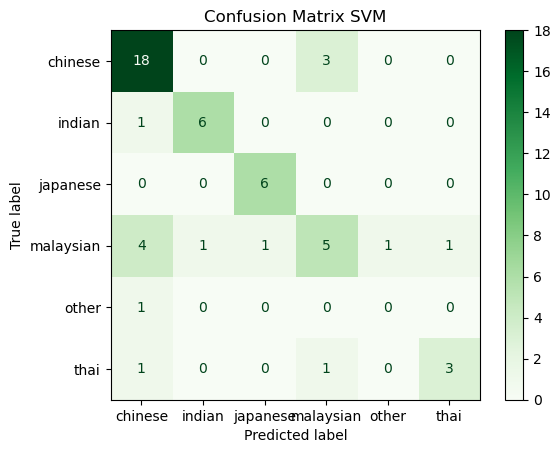

In [39]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(model_recipe['country'])

y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


graph = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
graph.plot(cmap='Greens')
plt.title("Confusion Matrix SVM")
plt.show()

### Mutlinomial Logistic Regression Model ###

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [42]:
y_encoded = le.fit_transform(model_recipe['country'])

In [43]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)  # unigrams + bigrams
X_vect = vectorizer.fit_transform(model_recipe['text_features'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [45]:
clf = LogisticRegression(
    multi_class='multinomial',  # for multi-class problems
    solver='lbfgs',             # recommended for multinomial
    max_iter=1000,              # increase if convergence warning
    class_weight='balanced',    # handle class imbalance
    random_state=42
)

clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [46]:
y_pred = clf.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 69.81%
Classification Report:

              precision    recall  f1-score   support

     chinese       0.80      0.80      0.80        20
      indian       0.71      0.83      0.77         6
    japanese       1.00      1.00      1.00         5
   malaysian       0.57      0.57      0.57        14
       other       0.00      0.00      0.00         3
        thai       0.60      0.60      0.60         5

    accuracy                           0.70        53
   macro avg       0.61      0.63      0.62        53
weighted avg       0.68      0.70      0.69        53



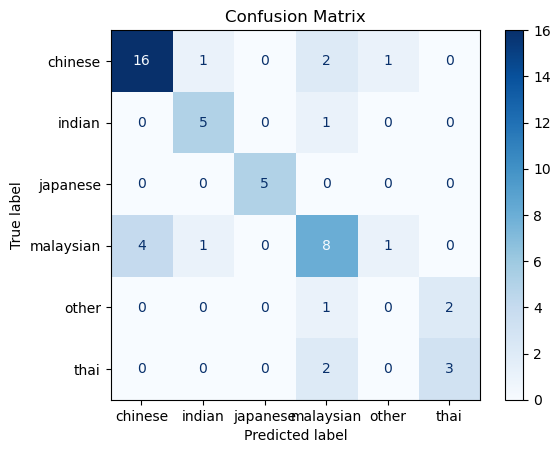

In [48]:
#Confusion Matrix to understand which recipes were being most confused, perhaps there are less differences between the cuisines that were most confused (here we see Malaysian)

# Predict on test set
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


graph = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
graph.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score


#Cross validation

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), min_df=2)),
    ('clf', LogisticRegression(
        multi_class='multinomial', 
        solver='lbfgs', 
        max_iter=500, 
        class_weight='balanced', 
        random_state=42
    ))
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')


print("Cross-validation accuracies:", scores)
print(f"Mean Accuracy: {scores.mean():.2%}")
print(f"Std Deviation: {scores.std():.2%}")

Cross-validation accuracies: [0.77358491 0.71698113 0.66037736 0.59615385 0.67307692]
Mean Accuracy: 68.40%
Std Deviation: 5.92%
